In [2]:
import torch

from stable_diffusion_fine_tuning.main import run_with_datasets, DatasetConfig
from stable_diffusion_fine_tuning.dataset import PokemonDataset

In [7]:
dataset = PokemonDataset()
dataset_config = DatasetConfig()
training_ds_size = int(len(dataset) * dataset_config.training_ds_ratio)
train_ds, test_ds = torch.utils.data.random_split(dataset, [training_ds_size, len(dataset) - training_ds_size])
train_dataloader = torch.utils.data.DataLoader(train_ds, batch_size=dataset_config.train_batch_size, shuffle=True, num_workers=0)
test_dataloader = torch.utils.data.DataLoader(test_ds, batch_size=dataset_config.test_batch_size, shuffle=True, num_workers=0)

/mnt/nfs/home/g.racic/stable_diffusion_pyenv/lib/python3.9/site-packages/huggingface_hub/utils/_deprecation.py:97: FutureWarning: Deprecated argument(s) used in 'dataset_info': token. Will not be supported from version '0.12'.
  warnings.warn(message, FutureWarning)
Using custom data configuration lambdalabs--pokemon-blip-captions-10e3527a764857bd
Reusing dataset parquet (/home/g.racic/.cache/huggingface/datasets/lambdalabs___parquet/lambdalabs--pokemon-blip-captions-10e3527a764857bd/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


In [8]:
pipe = run_with_datasets(
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader
)

Using seed: 23906


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

The config attributes {'feature_extractor': ['transformers', 'CLIPFeatureExtractor'], 'safety_checker': ['stable_diffusion', 'StableDiffusionSafetyChecker']} were passed to StableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.


Gradient checkpointing enabled: False


100%|██████████| 600/600 [04:31<00:00,  2.21it/s, loss=0.0576]


  0%|          | 0/51 [00:00<?, ?it/s]

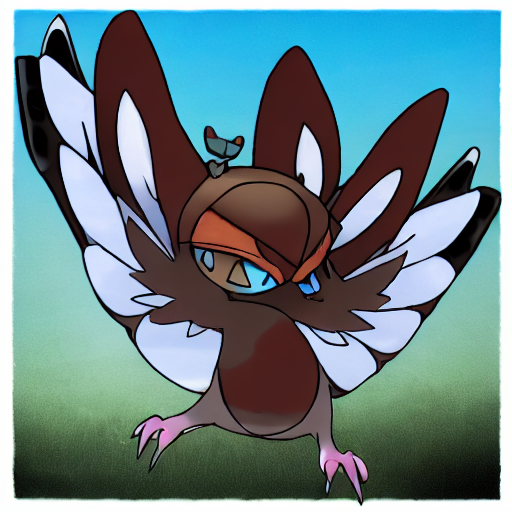

In [12]:
pipe("a threatening brown animal with wings, blue eyes and a hat")["sample"][0]